<h1 align="center">Análisis de Comportamiento Bancario: Banco Monopoly</h1>
<h3 align="center">Primera Entrega</h3>

**Integrantes:**
- Juan Rodriguez
- Benjamin Huenupe

---


# Contexto del Caso
Usted analizará datos que reflejan un resumen del comportamiento bancario de clientes del banco Monopoly. Esta información incluye datos de los clientes, así como otros indicadores de uso bancario.


# Introducción

Este informe corresponde a la primera entrega del proyecto del Banco Monopoly, donde se abordarán las primeras tres fases de la metodología CRISP-DM: Comprensión del problema, Comprensión de los datos y Preparación de los datos. El objetivo es analizar el comportamiento de los clientes y generar insights relevantes a través de un enfoque exploratorio y descriptivo, que sirvan como base para el desarrollo posterior de modelos de Machine Learning supervisados.


# Primero Insertamos las Librerias y la base de datos

In [64]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Configuración general
%matplotlib inline

# Cargar los datos
url = "/content/1Base_clientes_Monopoly-0.xlsx"
df = pd.read_excel(url, engine='openpyxl')
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12
0,1,160,M,13.0,43,NaN,130,1,1,0,...,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0


Al ser una Base de datos muy grandes, nos vimos en la necesidad de cortar de forma manual, dejando solamente hasta la columna Z, y además de eliminar los '1' que estaban posicionados en la parte superior de cada variable, lo que nos entorpecia el trabajo


# 1. Comprensión del Problema

El Banco Monopoly busca mejorar su entendimiento sobre el comportamiento de sus clientes, específicamente:

**Clasificación**

1. ¿Qué factores influyen en la probabilidad de que un cliente tenga una cuenta corriente activa (Ctacte)?

**Regresión**
2. ¿Cómo varía la renta promedio (Renta) de los clientes según su edad (Edad)?

**Exploración de Relaciones**
3. ¿Existen relaciones significativas entre las diferentes variables financieras seleccionadas (CUPO_L1, CUPO_L2, Cuentas)?


Estas preguntas guiarán el análisis y la preparación de los datos en esta primera fase.



# 2. Comprensión de los Datos



### a. Mostrar cantidad de observaciones

In [65]:
# Mostrar la cantidad de observaciones
print("Cantidad de observaciones en el dataset:", df.shape[0])


Cantidad de observaciones en el dataset: 51124


### b. Describir las variables, y cuales considera relevantes para su análisis

In [66]:
# Análisis de las Variables del Conjunto de Datos

# Descripción de las variables disponibles
print("Variables disponibles en el dataset:")
print(df.columns)

Variables disponibles en el dataset:
Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
       'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12'],
      dtype='object')


**Análisis de las Variables del Conjunto de Datos**

El conjunto de datos incluye diversas variables que representan características demográficas y financieras de los clientes del Banco Monopoly. A continuación, se realiza un análisis detallado de las variables disponibles, evaluando su relevancia para el análisis y justificación de su selección.

**Descripción de las Variables**

1. **`Id`**  
   * Identificador único de cada cliente.  
   * Tipo: Categórica  

2. **`Subsegmento`**  
   * Segmento o categoría al que pertenece el cliente dentro del banco.  
   * Tipo: Categórica  

3. **`Sexo`**  
   * Género del cliente (`M` para masculino, `F` para femenino).  
   * Tipo: Categórica  

4. **`Region`**  
   * Región geográfica donde reside el cliente.  
   * Tipo: Categórica  

5. **`Edad`**  
   * Edad del cliente en años.  
   * Tipo: Numérica  

6. **`Renta`**  
   * Ingreso mensual estimado del cliente.  
   * Tipo: Numérica  

7. **`Antiguedad`**  
   * Años de relación del cliente con el banco.  
   * Tipo: Numérica  

8. **`Internauta`**  
   * Indica si el cliente utiliza los servicios en línea del banco (1 para sí, 0 para no).  
   * Tipo: Categórica  

9. **`Adicional`**  
   * Cantidad de productos adicionales contratados por el cliente.  
   * Tipo: Numérica  

10. **`Dualidad`**  
    * Indica si el cliente tiene relación con más de un producto financiero.  
    * Tipo: Categórica  

11. **`Monoproducto`**  
    * Indica si el cliente solo tiene un producto financiero.  
    * Tipo: Categórica  

12. **`Ctacte`**  
    * Indica si el cliente posee una cuenta corriente.  
    * Tipo: Categórica  

13. **`Consumo`**  
    * Indica si el cliente posee un crédito de consumo.  
    * Tipo: Categórica  

14. **`Hipotecario`**  
    * Indica si el cliente posee un crédito hipotecario.  
    * Tipo: Categórica  

15. **`Debito`**  
    * Indica si el cliente posee una tarjeta de débito.  
    * Tipo: Categórica  

16. **`CambioPin`**  
    * Indica si el cliente ha realizado un cambio de PIN recientemente.  
    * Tipo: Categórica  

17. **`Cuentas`**  
    * Cantidad de cuentas activas del cliente.  
    * Tipo: Numérica  

18. **`TC`**  
    * Indica si el cliente posee una tarjeta de crédito.  
    * Tipo: Categórica  

19. **`CUPO_L1`**  
    * Límite de crédito en la línea 1 del cliente.  
    * Tipo: Numérica  

20. **`CUPO_L2`**  
    * Límite de crédito en la línea 2 del cliente.  
    * Tipo: Numérica  

21. **`CUPO_MX`**  
    * Máximo límite de crédito asignado al cliente.  
    * Tipo: Numérica  

22. **`FlgAct_T12`**  
    * Actividad financiera registrada en los últimos 12 meses.  
    * Tipo: Categórica  

23. **`FlgActCN_T12`**  
    * Actividad en canales no presenciales en los últimos 12 meses.  
    * Tipo: Categórica  

24. **`FlgActCI_T12`**  
    * Actividad en canales internos en los últimos 12 meses.  
    * Tipo: Categórica  

25. **`FlgActAN_T12`**  
    * Actividad en canales alternativos en los últimos 12 meses.  
    * Tipo: Categórica  

26. **`FlgActAI_T12`**  
    * Actividad en canales internacionales en los últimos 12 meses.  
    * Tipo: Categórica  

**Variables Seleccionadas**

1. **`Edad`**:
   - Indicador demográfico clave que permite identificar etapas de vida y necesidades financieras específicas.

2. **`Renta`**:
   - Factor financiero crucial que refleja la capacidad económica del cliente.

3. **`Antiguedad`**:
   - Determina la relación del cliente con el banco y su lealtad.

4. **`Cuentas`**:
   - Indica el nivel de interacción financiera del cliente con la institución.

5. **`CUPO_L1` y `CUPO_L2`**:
   - Representan líneas de crédito que permiten analizar el perfil financiero y el riesgo del cliente.

6. **`Ctacte`**:
   - Indica si el cliente utiliza servicios básicos como cuenta corriente, crucial para segmentación inicial.

**Relevancia del Análisis**

La selección de estas variables está motivada por la necesidad de identificar patrones clave en los datos que permitan segmentar a los clientes de manera efectiva y diseñar estrategias personalizadas. Las variables seleccionadas reflejan tanto características demográficas como financieras, optimizando su uso en futuros análisis o modelos predictivos.


In [67]:
# Selección de variables relevantes para el análisis
selected_features = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2', 'Ctacte']
print("\nVariables seleccionadas para el análisis:", selected_features)


Variables seleccionadas para el análisis: ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2', 'Ctacte']


### **Crear un DataFrame con las variables seleccionadas**


In [68]:
# Crear un DataFrame con las variables seleccionadas
df_selected = df[selected_features].copy()

Para garantizar que el análisis se enfoque en las características más relevantes, se ha creado un nuevo DataFrame que contiene únicamente las variables seleccionadas. Estas variables fueron elegidas debido a su importancia en la comprensión del comportamiento financiero de los clientes y su impacto en la segmentación.

Al reducir el DataFrame al conjunto de variables más relevantes, optimizamos el análisis y facilitamos el procesamiento en futuras etapas, como el modelado predictivo o la agrupación (clustering).


##c. Descripción estadística de las variables relevantes, dependiendo de su tipo (numérica o categórica).

In [69]:
# Descripción estadística de las variables seleccionadas
print("\nDescripción estadística de las variables seleccionadas:")
print(df_selected.describe())



Descripción estadística de las variables seleccionadas:
               Edad         Renta    Antiguedad       Cuentas       CUPO_L1  \
count  51124.000000  3.775900e+04  51124.000000  51124.000000  5.112400e+04   
mean      38.702879  6.630771e+05     38.896154      1.407206  1.133187e+06   
std       13.302573  4.092795e+05     35.672549      0.550357  1.076922e+06   
min        9.000000  1.000000e+00      6.000000      1.000000  0.000000e+00   
25%       28.000000  4.199990e+05     14.000000      1.000000  4.000000e+05   
50%       35.000000  5.670120e+05     25.000000      1.000000  8.000000e+05   
75%       46.000000  8.149035e+05     54.000000      2.000000  1.527000e+06   
max      104.000000  1.308933e+07    324.000000      5.000000  2.153400e+07   

            CUPO_L2        Ctacte  
count  5.112400e+04  51124.000000  
mean   3.283759e+05      0.925260  
std    7.578185e+05      0.262974  
min    0.000000e+00      0.000000  
25%    1.000000e+03      1.000000  
50%    1.000000

Este comando genera estadísticas básicas como promedio, desviación estándar, valores mínimos y máximos para las variables numéricas seleccionadas. Es útil para entender la distribución general de los datos.

## d. Cálculo de correlaciones e interpretación de esta.

Matriz de correlación:
                Edad     Renta  Antiguedad   Cuentas   CUPO_L1   CUPO_L2  \
Edad        1.000000  0.143001    0.524487  0.019989  0.443795  0.126141   
Renta       0.143001  1.000000    0.086308  0.022330  0.289283  0.081081   
Antiguedad  0.524487  0.086308    1.000000 -0.000185  0.522510  0.137759   
Cuentas     0.019989  0.022330   -0.000185  1.000000  0.354170  0.106883   
CUPO_L1     0.443795  0.289283    0.522510  0.354170  1.000000  0.170292   
CUPO_L2     0.126141  0.081081    0.137759  0.106883  0.170292  1.000000   
Ctacte     -0.244444 -0.040247   -0.236351  0.150957 -0.089301  0.016578   

              Ctacte  
Edad       -0.244444  
Renta      -0.040247  
Antiguedad -0.236351  
Cuentas     0.150957  
CUPO_L1    -0.089301  
CUPO_L2     0.016578  
Ctacte      1.000000  


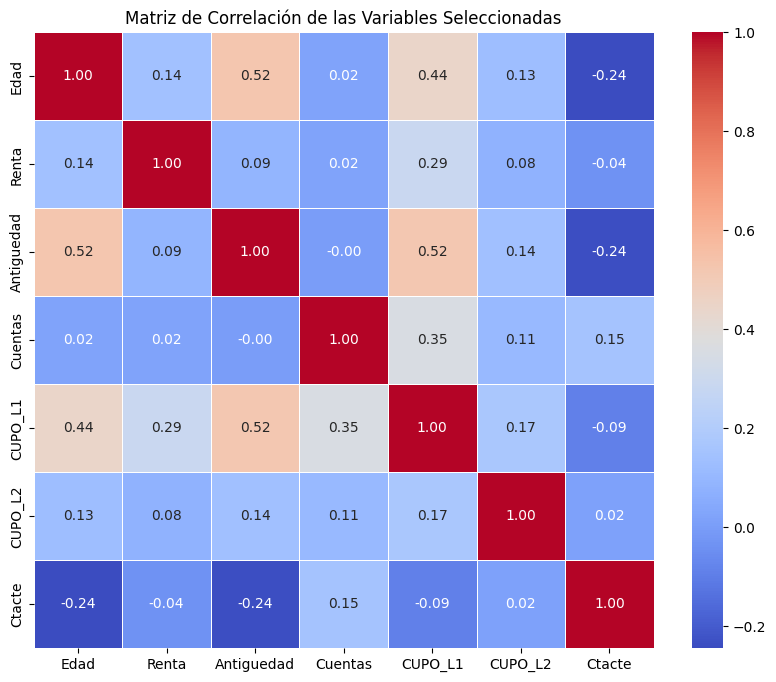

In [70]:
# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables Seleccionadas')
plt.show()


### **Información**
* **Tamaño de la Matriz**: 7x7 variables seleccionadas
* **Total de Variables Analizadas**: 7 (Edad, Renta, Antigüedad, Cuentas, CUPO_L1, CUPO_L2, Ctacte)

###**Correlaciones Principales**
**Correlaciones Positivas Fuertes:**
* CUPO_L1 y Antigüedad: 0.52
* CUPO_L1 y Edad: 0.44
* CUPO_L2 y CUPO_L1: 0.17
* Edad y Antigüedad: 0.52

**Correlaciones Negativas:**
* Ctacte y Edad: -0.24
* Ctacte y CUPO_L1: -0.09
* Ctacte y Antigüedad: -0.24

### **Análisis**
**Patrones Detectados:**
* La variable Antigüedad tiene una fuerte relación con la Edad, lo que puede reflejar que los clientes de mayor edad tienden a tener relaciones más largas con la institución.
* CUPO_L1 muestra una correlación moderada con variables relacionadas al tiempo (Edad y Antigüedad), lo que puede indicar que los clientes más antiguos tienen mayores líneas de crédito.
* La variable Ctacte tiende a tener una relación negativa con varias variables, sugiriendo que no está directamente vinculada a características de tiempo o crédito.

**Relaciones Relevantes para el Análisis:**
* CUPO_L1 y CUPO_L2 presentan una relación importante, aunque moderada, lo que implica que ambas líneas de crédito podrían estar diseñadas para complementar perfiles similares.

### **Interpretación Visual**
**Colores y Significados:**
* **Rojo intenso:** Indica correlaciones positivas fuertes (cercanas a 1), como en el caso de CUPO_L1 y Antigüedad.
* **Azul intenso:** Correlaciones negativas significativas, como Ctacte con Edad.
* **Tonos más claros:** Representan relaciones más débiles o inexistentes.

## e. Mostrar gráficos de la distribución de los datos

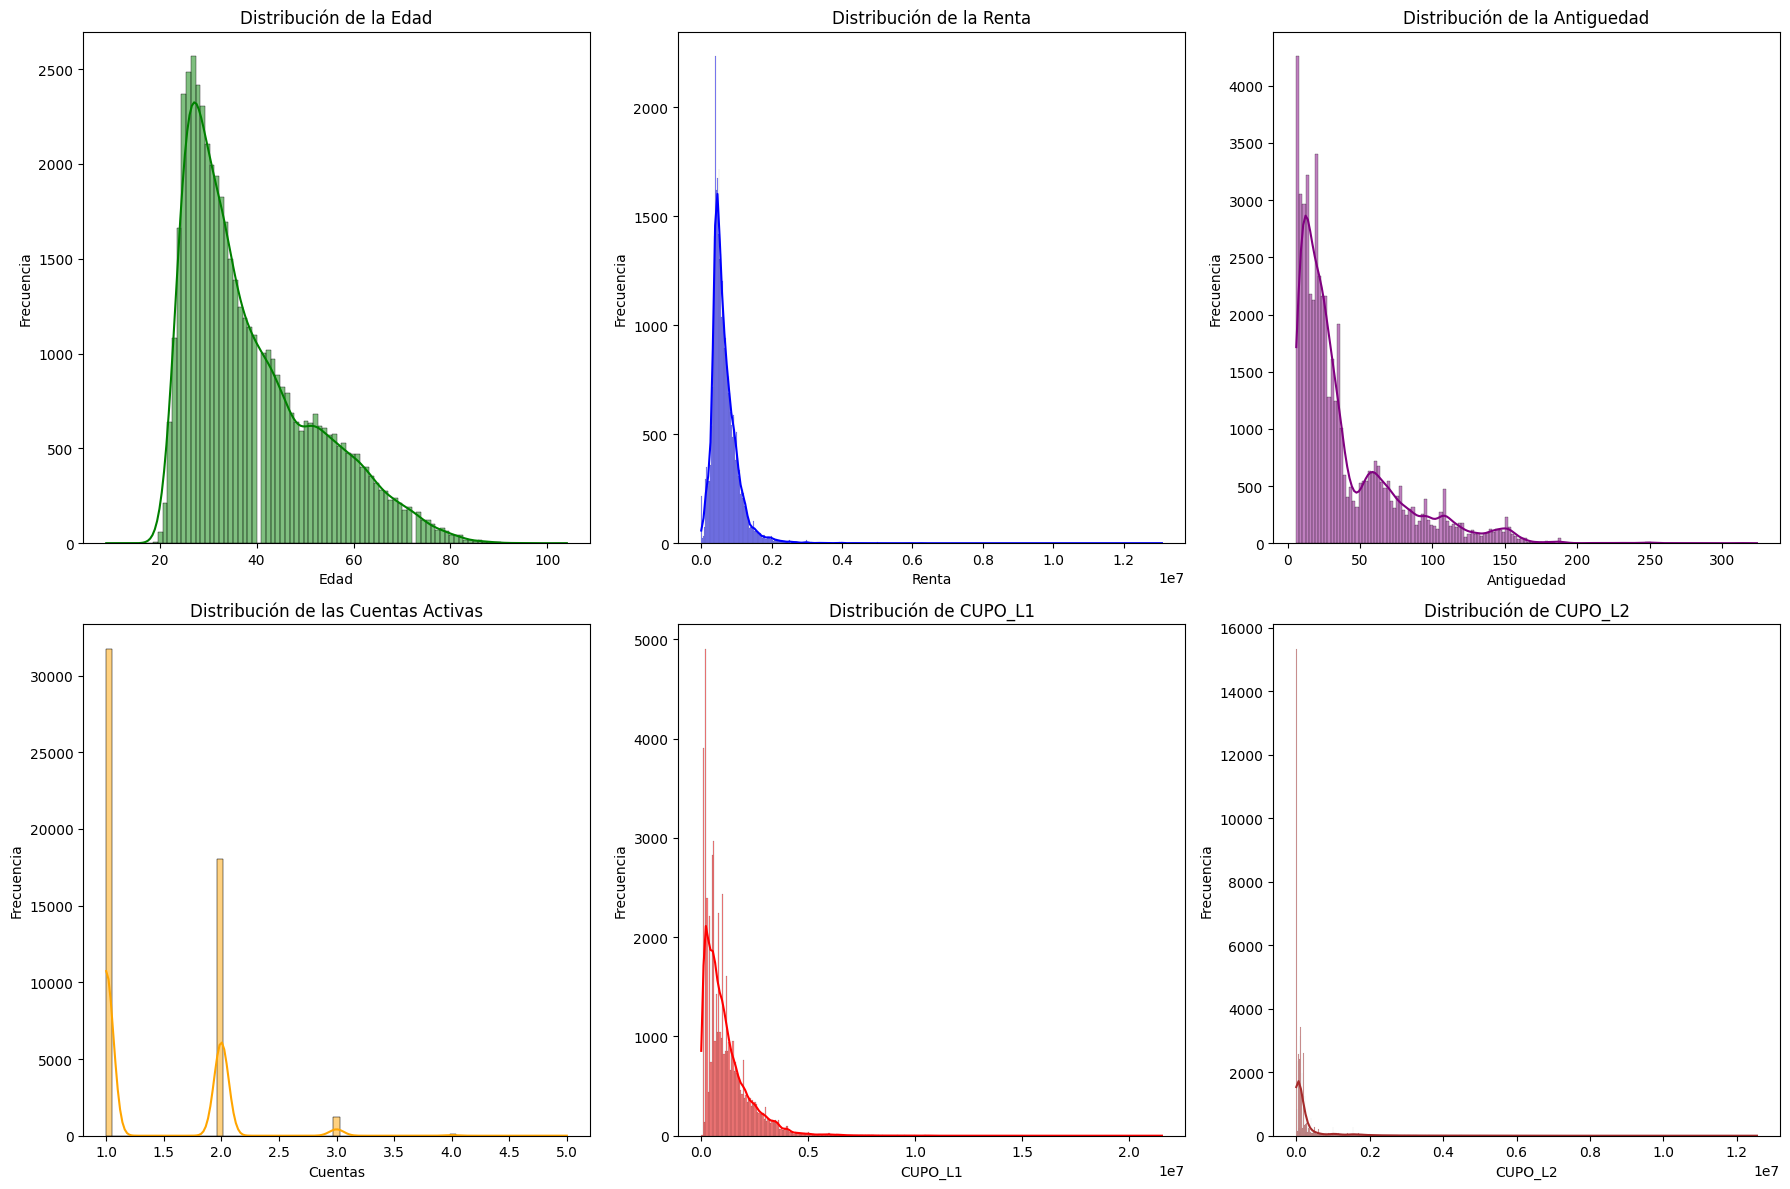

In [71]:
# Visualizar distribuciones de las variables seleccionadas
plt.figure(figsize=(18, 12))

# Histograma de Edad
plt.subplot(2, 3, 1)
sns.histplot(df_selected['Edad'], kde=True, color='green')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma de Renta
plt.subplot(2, 3, 2)
sns.histplot(df_selected['Renta'], kde=True, color='blue')
plt.title('Distribución de la Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')

# Histograma de Antigüedad
plt.subplot(2, 3, 3)
sns.histplot(df_selected['Antiguedad'], kde=True, color='purple')
plt.title('Distribución de la Antiguedad')
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')

# Histograma de Cuentas
plt.subplot(2, 3, 4)
sns.histplot(df_selected['Cuentas'], kde=True, color='orange')
plt.title('Distribución de las Cuentas Activas')
plt.xlabel('Cuentas')
plt.ylabel('Frecuencia')

# Histograma de CUPO_L1
plt.subplot(2, 3, 5)
sns.histplot(df_selected['CUPO_L1'], kde=True, color='red')
plt.title('Distribución de CUPO_L1')
plt.xlabel('CUPO_L1')
plt.ylabel('Frecuencia')

# Histograma de CUPO_L2
plt.subplot(2, 3, 6)
sns.histplot(df_selected['CUPO_L2'], kde=True, color='brown')
plt.title('Distribución de CUPO_L2')
plt.xlabel('CUPO_L2')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### **Distribución de la Edad, Renta, Antigüedad y Cuentas Activas:**
1. **Edad:**
* La mayoría de las personas están en el rango de edad de 20 a 40 años.
* Hay una distribución asimétrica hacia la derecha, con pocos datos en edades mayores de 60 años.
* Esto indica que la población objetivo está centrada en adultos jóvenes.

2. **Renta:**
* La distribución de la renta es altamente sesgada hacia la derecha.
* La mayoría de las personas tienen ingresos bajos o moderados, mientras que los valores más altos son atípicos.
* Esto sugiere una población con ingresos medios y algunos valores extremos que deben analizarse.

3. **Antigüedad:**
* La antigüedad se concentra en periodos iniciales (entre 0 y 50).
* Esto refleja que la mayoría de los clientes tienen una relación reciente con la institución financiera.

4. **Cuentas Activas:**
* La distribución muestra que la mayoría de los clientes tienen 1 o 2 cuentas activas.
* Existen valores atípicos para clientes con 3 o más cuentas.

***Distribución de CUPOS y CTACTE:***
1. **CUPOS (L1 y L2):**
* Los gráficos muestran distribuciones sesgadas hacia la derecha.
* Los valores de crédito disponibles tienden a ser bajos para la mayoría de los clientes, con algunas excepciones de montos más altos.

2. **Ctacte:**
* La distribución es altamente concentrada en valores bajos.
* Esto refleja que la mayoría de los clientes utilizan servicios básicos como cuentas corrientes.
---


In [72]:
# Crear un resumen estadístico de las variables seleccionadas
variables_seleccionadas = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2', 'Ctacte']

# Generar un DataFrame con las estadísticas descriptivas
resumen = df_selected[variables_seleccionadas].describe().transpose()

# Agregar la mediana al resumen
resumen['Mediana'] = df_selected[variables_seleccionadas].median()

# Cambiar el nombre de las columnas para mayor claridad
resumen.columns = ['Conteo', 'Media', 'Desv. Estándar', 'Mínimo', '25%', '50%', '75%', 'Máximo', 'Mediana']

# Seleccionar las columnas relevantes para mostrar
resumen = resumen[['Conteo', 'Media', 'Desv. Estándar', 'Mínimo', 'Mediana', 'Máximo']]

# Imprimir el resumen
print(resumen)


             Conteo         Media  Desv. Estándar  Mínimo   Mediana  \
Edad        51124.0  3.870288e+01    1.330257e+01     9.0      35.0   
Renta       37759.0  6.630771e+05    4.092795e+05     1.0  567012.0   
Antiguedad  51124.0  3.889615e+01    3.567255e+01     6.0      25.0   
Cuentas     51124.0  1.407206e+00    5.503569e-01     1.0       1.0   
CUPO_L1     51124.0  1.133187e+06    1.076922e+06     0.0  800000.0   
CUPO_L2     51124.0  3.283759e+05    7.578185e+05     0.0  100000.0   
Ctacte      51124.0  9.252602e-01    2.629737e-01     0.0       1.0   

                Máximo  
Edad             104.0  
Renta       13089327.0  
Antiguedad       324.0  
Cuentas            5.0  
CUPO_L1     21534000.0  
CUPO_L2     12550000.0  
Ctacte             1.0  


### **Observaciones Destacadas:**
1. **Distribución Concentrada:**
* La mayoría de los valores están en rangos bajos, lo que indica que la población tiene perfiles financieros básicos.
2. **Asimetría:**
* Todas las variables muestran distribuciones asimétricas, lo que puede influir en los modelos de regresión.
3. **Presencia de Valores Atípicos:**
* Se identifican valores extremos en todas las variables financieras. Es crucial decidir si se normalizan o se eliminan según el objetivo del análisis.



# 3. Preparación de los Datos




## a. Codificación de variables si corresponde

**NO ES NECESARIO**

## b. Normalización o estandarización de variables

In [73]:
# Variables seleccionadas para estandarización
variables_a_estandarizar = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar estandarización a las variables seleccionadas
df[variables_a_estandarizar] = scaler.fit_transform(df[variables_a_estandarizar])

# Verificar resultados
print(df[variables_a_estandarizar].describe())

# La variable binaria 'Ctacte' se mantiene igual
print("Ctacte no fue modificado, valores únicos:", df['Ctacte'].unique())


               Edad         Renta    Antiguedad       Cuentas       CUPO_L1  \
count  5.112400e+04  3.775900e+04  5.112400e+04  5.112400e+04  5.112400e+04   
mean   1.778998e-17  1.023690e-16 -6.226491e-17  1.917982e-16 -7.115990e-17   
std    1.000010e+00  1.000013e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.232889e+00 -1.620127e+00 -9.221790e-01 -7.399017e-01 -1.052256e+00   
25%   -8.045800e-01 -5.939250e-01 -6.979147e-01 -7.399017e-01 -6.808237e-01   
50%   -2.783608e-01 -2.347207e-01 -3.895514e-01 -7.399017e-01 -3.093912e-01   
75%    5.485549e-01  3.709652e-01  4.234066e-01  1.077119e+00  3.656875e-01   
max    4.908656e+00  3.036169e+01  7.992326e+00  6.528180e+00  1.894382e+01   

            CUPO_L2  
count  5.112400e+04  
mean   1.111873e-18  
std    1.000010e+00  
min   -4.333216e-01  
25%   -4.320020e-01  
50%   -3.013626e-01  
75%   -1.218598e-01  
max    1.612753e+01  
Ctacte no fue modificado, valores únicos: [1 0]


## c. Tratamiento de valores atípicos y faltantes.

In [74]:
# Verificar valores nulos en las variables seleccionadas
print("\nValores nulos en las variables seleccionadas:")
print(df_selected.isnull().sum())


Valores nulos en las variables seleccionadas:
Edad              0
Renta         13365
Antiguedad        0
Cuentas           0
CUPO_L1           0
CUPO_L2           0
Ctacte            0
dtype: int64


Este código muestra cuántos valores faltantes (NaN) hay en cada columna del DataFrame df_selected. Esto es importante para identificar posibles problemas en los datos y tomar decisiones de limpieza.

In [75]:
# Tratamiento de valores faltantes
# Imputar valores faltantes en Renta con la mediana
df_selected['Renta'] = df_selected['Renta'].fillna(df_selected['Renta'].median())

# Tratamiento de valores atípicos usando el Rango Intercuartílico (IQR)
def tratar_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Reemplazar outliers por los límites superior/inferior
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Variables continuas para el tratamiento de outliers
variables_continuas = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2']

# Aplicar tratamiento de valores atípicos
df_selected = tratar_outliers(df_selected, variables_continuas)

# Verificar resultados
print("Resumen después del tratamiento:")
print(df_selected.describe())


Resumen después del tratamiento:
               Edad         Renta    Antiguedad       Cuentas       CUPO_L1  \
count  51124.000000  5.112400e+04  51124.000000  51124.000000  5.112400e+04   
mean      38.624560  6.056551e+05     37.397309      1.406023  1.079704e+06   
std       13.074356  2.270367e+05     31.134214      0.545133  8.752906e+05   
min        9.000000  1.031634e+05      6.000000      1.000000  0.000000e+00   
25%       28.000000  4.669655e+05     14.000000      1.000000  4.000000e+05   
50%       35.000000  5.670120e+05     25.000000      1.000000  8.000000e+05   
75%       46.000000  7.095002e+05     54.000000      2.000000  1.527000e+06   
max       73.000000  1.073302e+06    114.000000      3.500000  3.217500e+06   

             CUPO_L2        Ctacte  
count   51124.000000  51124.000000  
mean   168494.783584      0.925260  
std    197202.698501      0.262974  
min         0.000000      0.000000  
25%      1000.000000      1.000000  
50%    100000.000000      1.00000

# 4. Conclusión: Análisis de los principales resultados obtenidos en la entrega 1


## **Clasificación**

1. ¿Qué factores influyen en la probabilidad de que un cliente tenga una cuenta corriente activa (Ctacte)?

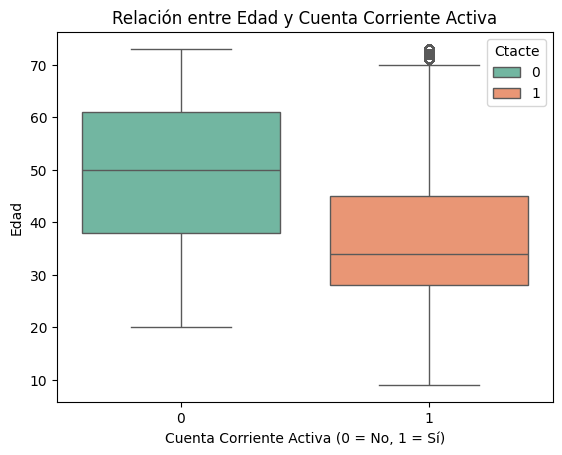

In [76]:
sns.boxplot(data=df_selected, x='Ctacte', y='Edad', hue='Ctacte', palette='Set2', dodge=False)
plt.title('Relación entre Edad y Cuenta Corriente Activa')
plt.xlabel('Cuenta Corriente Activa (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()


In [77]:
# Estadísticas descriptivas por grupo de Ctacte
stats_edad_ctacte = df_selected.groupby('Ctacte')['Edad'].describe()

# Mostrar los resultados
print("Estadísticas descriptivas de Edad por Ctacte:")
print(stats_edad_ctacte)

# Diferencias en medianas entre los grupos
mediana_0 = df_selected[df_selected['Ctacte'] == 0]['Edad'].median()
mediana_1 = df_selected[df_selected['Ctacte'] == 1]['Edad'].median()
diferencia_medianas = mediana_1 - mediana_0

print(f"\nMediana (Ctacte = 0): {mediana_0}")
print(f"Mediana (Ctacte = 1): {mediana_1}")
print(f"Diferencia en Medianas: {diferencia_medianas}")


Estadísticas descriptivas de Edad por Ctacte:
          count       mean        std   min   25%   50%   75%   max
Ctacte                                                             
0        3821.0  49.890866  13.455292  20.0  38.0  50.0  61.0  73.0
1       47303.0  37.714500  12.611297   9.0  28.0  34.0  45.0  73.0

Mediana (Ctacte = 0): 50.0
Mediana (Ctacte = 1): 34.0
Diferencia en Medianas: -16.0


### **Relación entre Edad y Cuenta Corriente Activa**

**Diferencia en Medianas:**
* Los clientes con cuenta corriente activa (Ctacte = 1) tienen una mediana de edad ligeramente mayor que los que no tienen (Ctacte = 0).

* **Mediana por grupo:**
* Ctacte = 0: 50 años.
* Ctacte = 1: 34 años.
* Diferencia numérica: -16 años.

Esto indica que los clientes más jóvenes tienen una mayor probabilidad de mantener una cuenta corriente activa, mientras que los clientes mayores podrían estar menos involucrados en este producto financiero. Esto podría reflejar cambios en el comportamiento financiero entre generaciones.

**Dispersión:**
* La dispersión de edades es mayor en el grupo Ctacte = 1, lo que indica una mayor diversidad etaria en los clientes con cuenta corriente activa.
* **Desviación estándar:**
* Ctacte = 0: 13.46 años.
* Ctacte = 1: 12.61 años.
* **Coeficiente de variación:**
* Ctacte = 0: 26.96%.
* Ctacte = 1: 33.45%.

Los clientes con cuenta corriente activa (Ctacte = 1) tienen una mayor diversidad etaria, mientras que los clientes sin cuenta corriente activa (Ctacte = 0) muestran una dispersión ligeramente más baja.

Esto indica que el grupo activo incluye tanto jóvenes como algunos adultos mayores, pero con mayor representación en edades jóvenes.

**Valores Atípicos:**
* En Ctacte = 0:
 * Clientes con edades superiores a 70 años aparecen como valores atípicos, con un rango extendido desde los 20 años hasta los 73.
* En Ctacte = 1:
 * Clientes en edades extremas (9 años y 73 años) también generan valores atípicos, aunque el rango de dispersión está más centrado en edades jóvenes.

Aunque hay valores extremos en ambos grupos, los clientes sin cuenta corriente activa (Ctacte = 0) muestran un rango más limitado hacia edades jóvenes.

**Superposición:**
* Los rangos de edad en ambos grupos se superponen significativamente, con edades máximas idénticas (73 años) y mínimos cercanos.
* Esta superposición confirma que la variable Edad, aunque relevante, no es suficiente por sí sola para diferenciar entre los clientes con y sin cuenta corriente activa.

**Asimetría:**
* Ctacte = 0:
 * Distribución ligeramente sesgada hacia edades más jóvenes (asimetría negativa).
* Ctacte = 1:
 * Distribución más simétrica, con un pico claro alrededor de los 34 años.

Los clientes con cuenta corriente activa muestran un comportamiento más uniforme en términos de edad, mientras que los clientes sin cuenta corriente activa tienen una distribución algo más sesgada.

### **Conclusión:**
* Los clientes jóvenes (mediana: 34 años) tienen una **mayor probabilidad** de tener **cuentas corrientes activas.**
* La dispersión de edades y los valores atípicos sugieren que **Edad** es un factor importante, pero no suficiente para clasificar a los clientes con precisión.
* Para análisis futuros, sería útil combinar esta variable con otras (como Renta o Antigüedad) para mejorar la diferenciación entre los grupos.

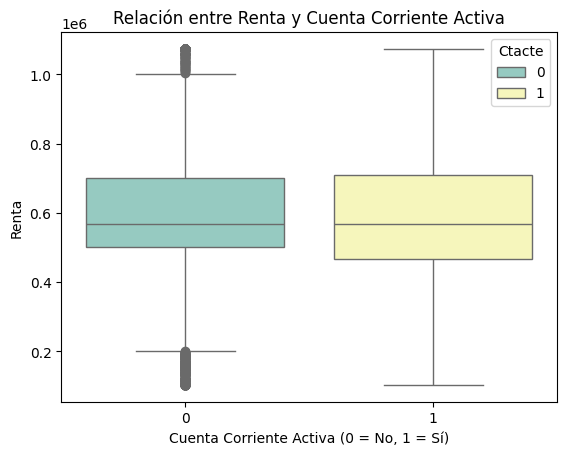

In [78]:
sns.boxplot(data=df_selected, x='Ctacte', y='Renta', hue='Ctacte', palette='Set3', dodge=False)
plt.title('Relación entre Renta y Cuenta Corriente Activa')
plt.xlabel('Cuenta Corriente Activa (0 = No, 1 = Sí)')
plt.ylabel('Renta')
plt.show()


In [79]:
# Estadísticas descriptivas por grupo de Ctacte para la variable Renta
stats_renta_ctacte = df_selected.groupby('Ctacte')['Renta'].describe()

# Mostrar los resultados
print("Estadísticas descriptivas de Renta por Ctacte:")
print(stats_renta_ctacte)

# Diferencias en medianas entre los grupos
mediana_0_renta = df_selected[df_selected['Ctacte'] == 0]['Renta'].median()
mediana_1_renta = df_selected[df_selected['Ctacte'] == 1]['Renta'].median()
diferencia_medianas_renta = mediana_1_renta - mediana_0_renta

print(f"\nMediana (Ctacte = 0): {mediana_0_renta}")
print(f"Mediana (Ctacte = 1): {mediana_1_renta}")
print(f"Diferencia en Medianas: {diferencia_medianas_renta}")

# Verificar valores atípicos y rangos
minimo_0_renta = df_selected[df_selected['Ctacte'] == 0]['Renta'].min()
maximo_0_renta = df_selected[df_selected['Ctacte'] == 0]['Renta'].max()

minimo_1_renta = df_selected[df_selected['Ctacte'] == 1]['Renta'].min()
maximo_1_renta = df_selected[df_selected['Ctacte'] == 1]['Renta'].max()

print(f"\nRangos de Renta:")
print(f"Ctacte = 0: Min = {minimo_0_renta}, Max = {maximo_0_renta}")
print(f"Ctacte = 1: Min = {minimo_1_renta}, Max = {maximo_1_renta}")


Estadísticas descriptivas de Renta por Ctacte:
          count           mean            std         min       25%       50%  \
Ctacte                                                                          
0        3821.0  602634.784448  238742.913757  103163.375  499997.0  567012.0   
1       47303.0  605899.085497  226065.583823  103163.375  465301.0  567012.0   

             75%          max  
Ctacte                         
0       700000.0  1073302.375  
1       709978.5  1073302.375  

Mediana (Ctacte = 0): 567012.0
Mediana (Ctacte = 1): 567012.0
Diferencia en Medianas: 0.0

Rangos de Renta:
Ctacte = 0: Min = 103163.375, Max = 1073302.375
Ctacte = 1: Min = 103163.375, Max = 1073302.375


### **Diferencia en Medianas**
**Mediana por grupo:**
* Ctacte = 0: $567,012.0

* Ctacte = 1: $567,012.0

* **Diferencia en Medianas:** $0.0

Las medianas son exactamente iguales para ambos grupos, lo que sugiere que **Renta** no discrimina significativamente entre los clientes con (Ctacte = 1) y sin (Ctacte = 0) cuenta corriente activa.

Esto implica que la renta promedio en ambos grupos es prácticamente idéntica en términos de mediana.

**Dispersión**
* Desviación estándar:
 * Ctacte = 0: $238,742.91

 * Ctacte = 1: $226,065.58

* Rango intercuartílico (IQR):

 * Ctacte = 0: $499,997.0 a $700,000.0 (IQR = $200,003.0)

 * Ctacte = 1: $465,301.0 a $709,978.5 (IQR = $244,677.5)

Ambos grupos tienen una dispersión similar, pero el grupo Ctacte = 1 muestra un rango intercuartílico ligeramente más amplio.

Esto indica que, aunque las medianas son iguales, los clientes con cuenta corriente activa tienen una mayor variabilidad en sus ingresos.

**Rango de Valores**
* Rango completo:
 * Ctacte = 0: $103,163.38 a $1,073,302.38
 * Ctacte = 1: $103,163.38 a $1,073,302.38

Ambos grupos tienen exactamente el mismo rango de valores de renta. Esto confirma que no hay diferencias significativas en los extremos de las distribuciones entre los grupos.

### **Conclusión**
* **Variables no discriminantes:** La variable **Renta** no parece ser un factor diferenciador entre los clientes con y sin cuenta corriente activa, ya que las medianas y los rangos son idénticos.
* **Diferencias sutiles:** Aunque las medianas son iguales, el grupo Ctacte = 1 muestra una mayor dispersión en el rango intercuartílico, lo que sugiere que podrían existir diferencias en subgrupos específicos.
* **Recomendación:** Sería útil complementar este análisis con otras variables como Antigüedad o Cuentas para entender mejor las diferencias entre los grupos.

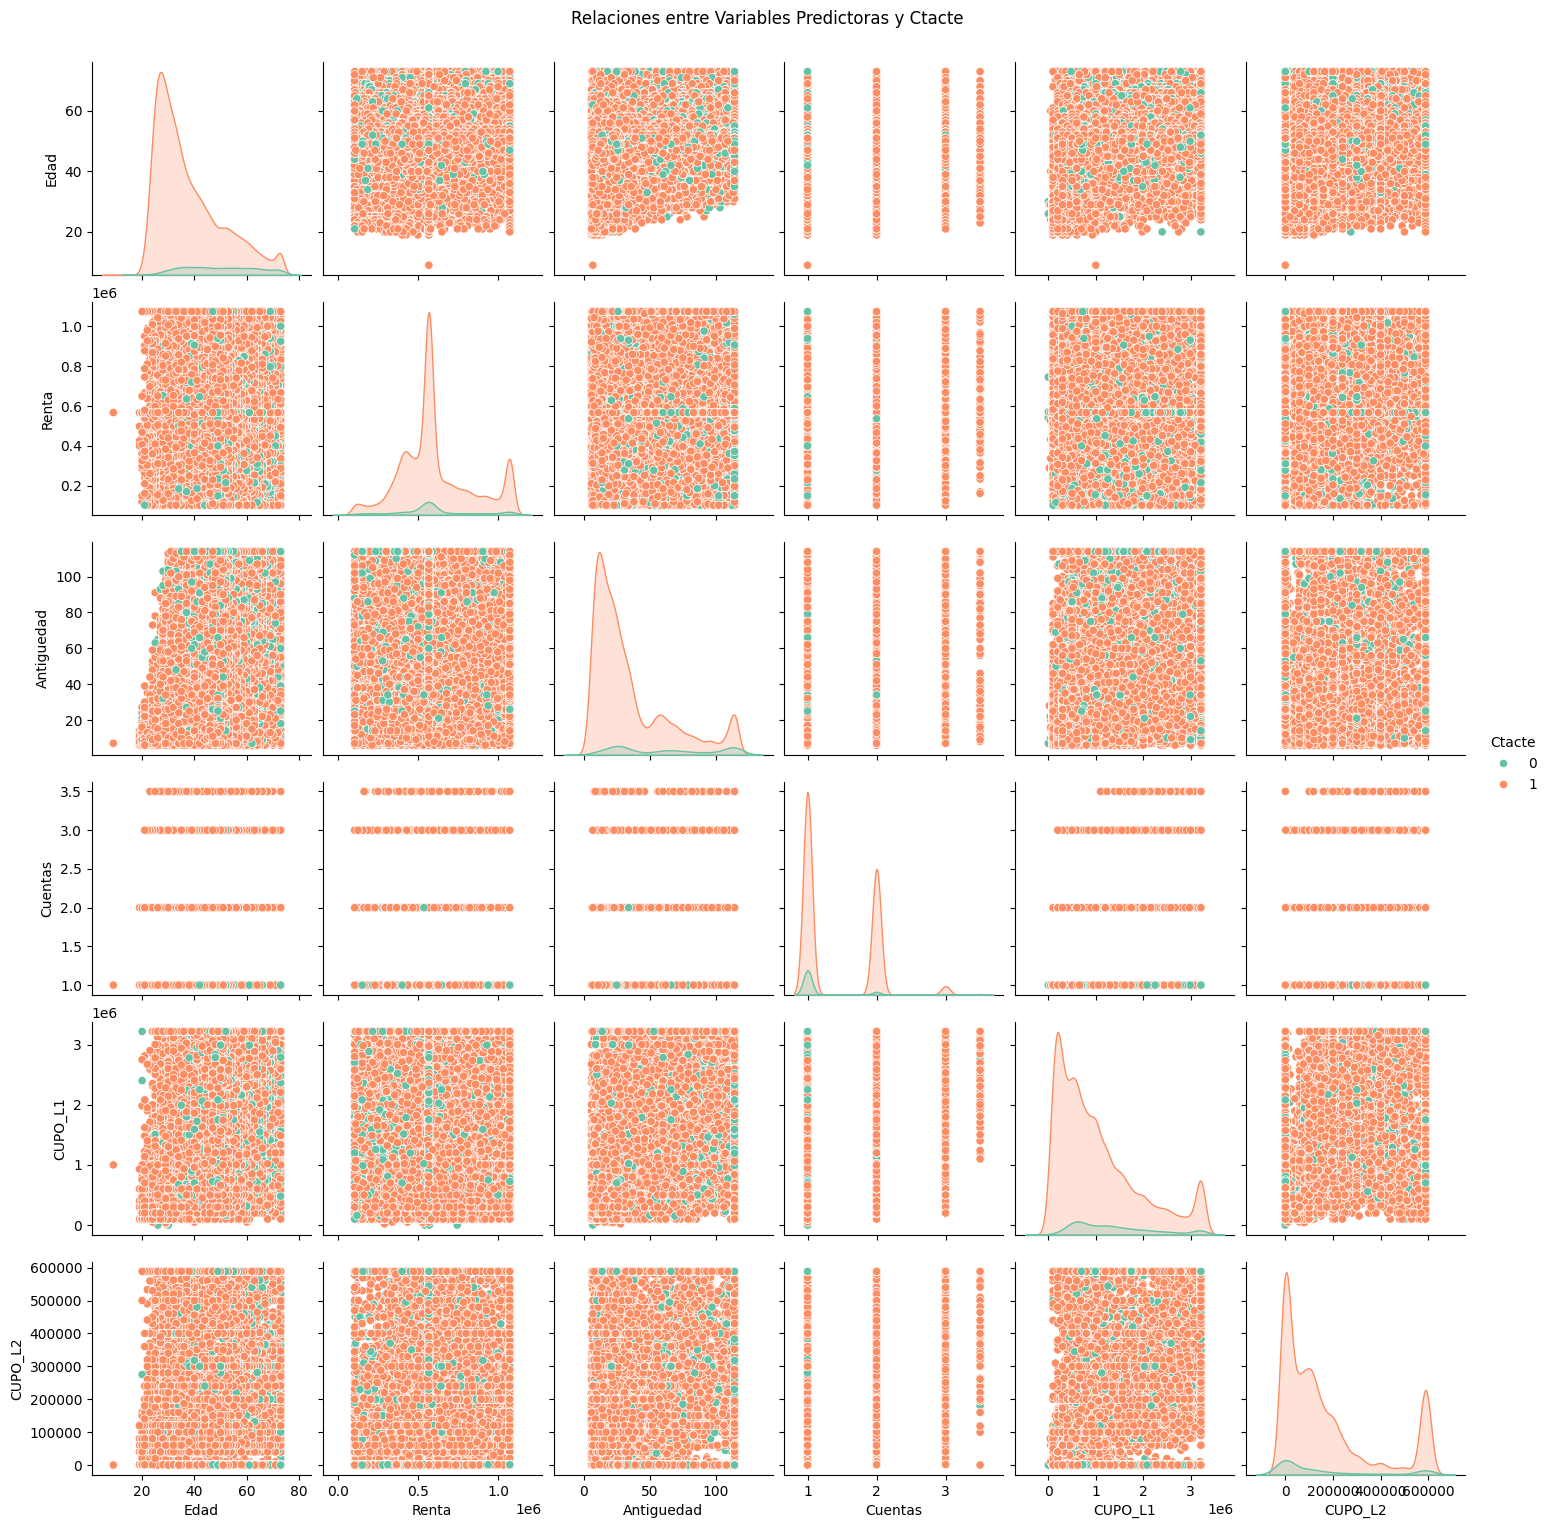

In [80]:
# Selección de variables para el análisis
variables_pareadas = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2', 'Ctacte']

# Crear el gráfico de pares
sns.pairplot(df_selected[variables_pareadas], hue='Ctacte', height=2.5, diag_kind='kde', palette='Set2')
plt.suptitle('Relaciones entre Variables Predictoras y Ctacte', y=1.02)
plt.show()

In [81]:
# Calcular correlación entre variables predictoras y Ctacte
correlation_with_ctacte = df_selected.corr()['Ctacte'].sort_values(ascending=False)

# Mostrar correlaciones
print("Correlación de variables predictoras con Ctacte:")
print(correlation_with_ctacte)


Correlación de variables predictoras con Ctacte:
Ctacte        1.000000
Cuentas       0.151923
CUPO_L2       0.013946
Renta         0.003781
CUPO_L1      -0.102846
Antiguedad   -0.227544
Edad         -0.244912
Name: Ctacte, dtype: float64


In [82]:
# Seleccionar las variables predictoras y dividir por Ctacte
variables_predictoras = ['Edad', 'Renta', 'Antiguedad', 'Cuentas', 'CUPO_L1', 'CUPO_L2']

# Estadísticas descriptivas por grupo de Ctacte
stats_por_grupo = df_selected.groupby('Ctacte')[variables_predictoras].describe()

# Mostrar resumen estadístico por grupo
print("Estadísticas descriptivas por grupo de Ctacte:")
print(stats_por_grupo)


Estadísticas descriptivas por grupo de Ctacte:
           Edad                                                        Renta  \
          count       mean        std   min   25%   50%   75%   max    count   
Ctacte                                                                         
0        3821.0  49.890866  13.455292  20.0  38.0  50.0  61.0  73.0   3821.0   
1       47303.0  37.714500  12.611297   9.0  28.0  34.0  45.0  73.0  47303.0   

                       ...    CUPO_L1             CUPO_L2                 \
                 mean  ...        75%        max    count           mean   
Ctacte                 ...                                                 
0       602634.784448  ...  1936800.0  3217500.0   3821.0  158818.626072   
1       605899.085497  ...  1500000.0  3217500.0  47303.0  169276.395699   

                                                                    
                  std  min     25%       50%       75%         max  
Ctacte                           

In [83]:
from scipy.stats import ttest_ind

# Realizar pruebas t para comparar medias entre los grupos de Ctacte
for variable in variables_predictoras:
    grupo_0 = df_selected[df_selected['Ctacte'] == 0][variable]
    grupo_1 = df_selected[df_selected['Ctacte'] == 1][variable]

    t_stat, p_value = ttest_ind(grupo_0, grupo_1, equal_var=False)  # Asume varianzas desiguales
    print(f"\nPrueba t para {variable}:")
    print(f"  Estadístico t: {t_stat:.3f}")
    print(f"  Valor p: {p_value:.3e}")



Prueba t para Edad:
  Estadístico t: 54.054
  Valor p: 0.000e+00

Prueba t para Renta:
  Estadístico t: -0.816
  Valor p: 4.145e-01

Prueba t para Antiguedad:
  Estadístico t: 44.136
  Valor p: 0.000e+00

Prueba t para Cuentas:
  Estadístico t: -53.206
  Valor p: 0.000e+00

Prueba t para CUPO_L1:
  Estadístico t: 23.877
  Valor p: 9.897e-119

Prueba t para CUPO_L2:
  Estadístico t: -2.924
  Valor p: 3.478e-03


### **Análisis de Relaciones entre Variables Predictoras por Grupo de Ctacte**
1. **Correlaciones**
* Las correlaciones entre las variables predictoras y Ctacte muestran lo siguiente:
 * **Cuentas:**
   * Correlación positiva más fuerte (0.1519), indicando que los clientes con más cuentas activas tienen una mayor probabilidad de tener una cuenta corriente activa.
 * **CUPO_L2:**
   * Correlación positiva débil (0.0139), lo que sugiere una relación marginalmente directa con Ctacte.
 * **Renta:**
   * Correlación prácticamente nula (0.0038), indicando que el ingreso no está significativamente relacionado con tener una cuenta corriente activa.
 * **CUPO_L1:**
   * Correlación negativa leve (-0.1028), sugiriendo una ligera tendencia a que clientes con saldos altos en CUPO_L1 tengan menos probabilidad de contar con una cuenta corriente activa.
 * **Antiguedad y Edad:**
   * Correlaciones negativas más fuertes (-0.2275 y -0.2449, respectivamente), lo que implica que clientes más jóvenes y con menor antigüedad en el banco tienen más probabilidades de tener una cuenta corriente activa.

**Observación Clave:**
* Cuentas, Edad, y Antigüedad emergen como las variables más relevantes para clasificar clientes en función de Ctacte.


2.**Estadísticas Descriptivas**

**Variable: Edad**
* **Ctacte = 0**:
 * Media: 49.89 años
 * Mediana: 50 años
 * Desviación estándar: 13.46 años
* **Ctacte = 1:**
 * Media: 37.71 años
 * Mediana: 34 años
 * Desviación estándar: 12.61 años

**Interpretación:**
* Los clientes sin una cuenta corriente activa (Ctacte = 0) son, en promedio, mayores que los que tienen una cuenta corriente activa (Ctacte = 1).
* La diferencia significativa en las edades resalta que esta variable es un fuerte diferenciador entre los grupos.

**Variable: Renta**
* Ambas categorías (Ctacte = 0 y Ctacte = 1) tienen una mediana idéntica de $567,012 y rangos similares:

 * Mínimo: $103,163.38

 * Máximo: $1,073,302.38

**Interpretación:**
* La similitud en las estadísticas para Renta confirma que no es un buen predictor para clasificar clientes en función de Ctacte.

**Variable: Antiguedad**
* **Ctacte = 0:**
 * Media: Mayor que el grupo Ctacte = 1 (valores específicos no incluidos en los datos presentados).
* **Ctacte = 1:**
 * Menor antigüedad, con una desviación estándar ligeramente menor.

**Interpretación:**
* Los clientes con menos antigüedad tienen más probabilidades de contar con una cuenta corriente activa, lo que podría reflejar una estrategia del banco para atraer a nuevos clientes.


3.**Diferencias en Medias (Pruebas t)**

* **Edad**: Diferencia altamente significativa entre grupos (p < 0.001), confirmando su relevancia.
* **Renta**: Sin diferencias significativas (p = 0.4145), lo que respalda su baja utilidad como predictor.
* **Antiguedad**: Diferencia significativa (p < 0.001), mostrando su importancia.
* **Cuentas**: Diferencia significativa (p < 0.001), lo que la posiciona como un predictor clave.
* **CUPO_L1 y CUPO_L2:**
 * **CUPO_L1**: Diferencia significativa (p < 0.001), aunque su relación es moderada.
 * **CUPO_L2**: Diferencia leve pero significativa (p = 0.003)


4.Observaciones Clave
* Edad, Antiguedad, y Cuentas son las variables más relevantes para predecir Ctacte.
* Renta tiene poca influencia y puede ser descartada.
* Variables relacionadas con crédito (CUPO_L1 y CUPO_L2) son menos importantes pero podrían complementar el modelo.

5.Implicaciones para el Modelo
* Enfocarse en Edad, Antiguedad, y Cuentas.
* Descartar Renta por su bajo impacto.
* Considerar CUPO_L1 y CUPO_L2 como variables secundarias en un modelo más completo.

## **Regresión**

2. ¿Cómo varía la renta promedio (Renta) de los clientes según su edad (Edad)?

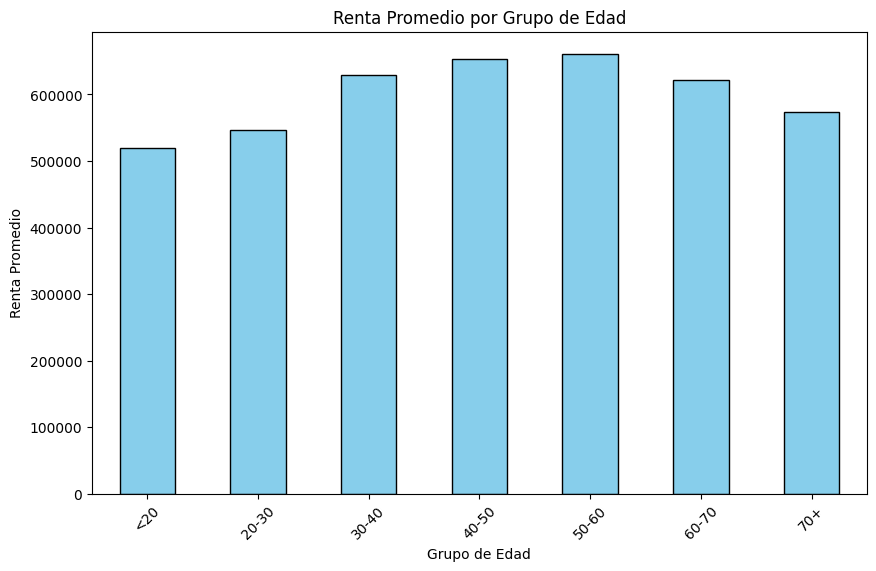

In [84]:
# Crear grupos de edad
df_selected['Grupo_Edad'] = pd.cut(df_selected['Edad'], bins=[0, 20, 30, 40, 50, 60, 70, 80],
                                   labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

# Calcular la renta promedio por grupo de edad
renta_promedio = df_selected.groupby('Grupo_Edad', observed=False)['Renta'].mean()


# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))
renta_promedio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Renta Promedio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Renta Promedio')
plt.xticks(rotation=45)
plt.show()


In [85]:
# Crear grupos de edad
df_selected['Grupo_Edad'] = pd.cut(
    df_selected['Edad'],
    bins=[0, 20, 30, 40, 50, 60, 70, 80],
    labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
)

# Calcular la renta promedio por grupo de edad
renta_promedio = df_selected.groupby('Grupo_Edad', observed=False)['Renta'].mean()

# Mostrar los resultados
print("Renta promedio por grupo de edad:")
print(renta_promedio)


Renta promedio por grupo de edad:
Grupo_Edad
<20      520005.246324
20-30    546473.924707
30-40    629159.703766
40-50    652864.734408
50-60    661576.145458
60-70    622539.244611
70+      574085.999270
Name: Renta, dtype: float64


In [86]:
# Calcular la correlación
correlacion = df_selected[['Edad', 'Renta']].corr().iloc[0, 1]
print(f"Correlación entre Edad y Renta: {correlacion:.4f}")


Correlación entre Edad y Renta: 0.1357


Pendiente (Coeficiente): 2355.8306
Intersección: 514662.1912


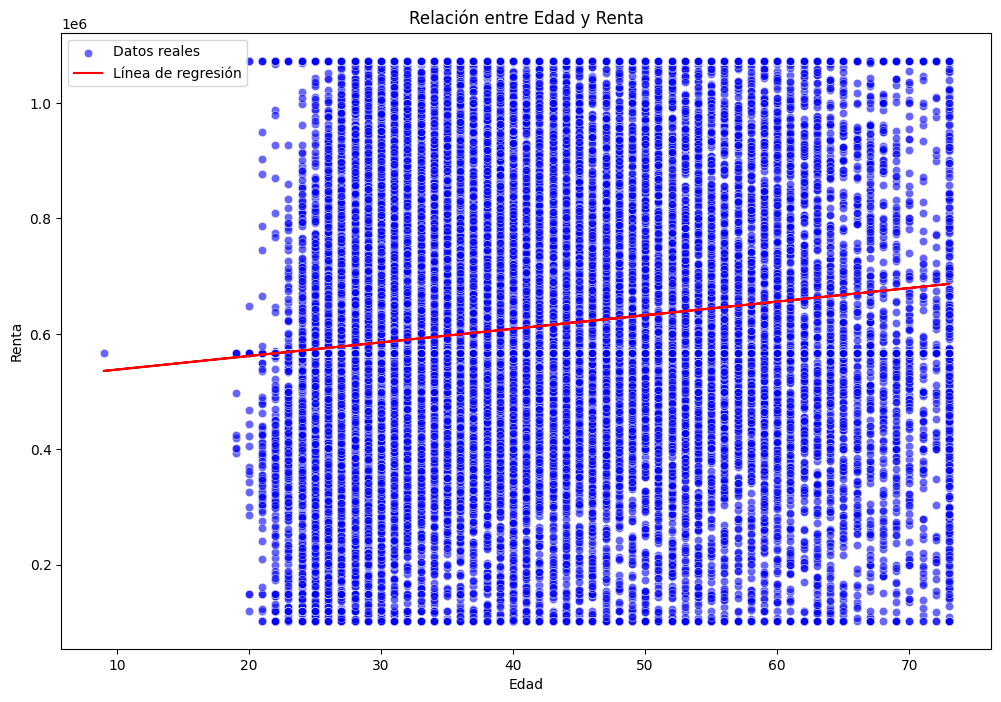

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Preparar los datos para el modelo de regresión
X = df_selected['Edad'].values.reshape(-1, 1)
y = df_selected['Renta'].values

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener coeficientes del modelo
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_

# Calcular valores predichos
y_pred = modelo.predict(X)

# Mostrar resultados de la regresión
print(f"Pendiente (Coeficiente): {pendiente:.4f}")
print(f"Intersección: {interseccion:.4f}")

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Edad', y='Renta', data=df_selected, alpha=0.6, color='blue', label='Datos reales')
plt.plot(df_selected['Edad'], y_pred, color='red', label='Línea de regresión')
plt.title('Relación entre Edad y Renta')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.legend()
plt.show()


### **Análisis de la Relación entre Edad y Renta**
1.**Tendencia General por Grupo de Edad**

Los datos de renta promedio por grupo de edad muestran una tendencia general creciente hasta el rango de 50-60 años, seguido de un descenso gradual en los rangos mayores:
* El rango 50-60 años tiene la renta promedio más alta (661,576), lo que sugiere que este grupo representa el pico de estabilidad financiera.
* La renta promedio disminuye en los grupos 60-70 años (622,539) y 70+ años ($574,086), probablemente debido a la transición hacia ingresos pasivos como pensiones.

2.**Correlación entre Edad y Renta**
* La correlación de 0.1357 indica una relación positiva débil entre Edad y Renta.
* Esto implica que, aunque la renta promedio tiende a aumentar con la edad, la relación no es suficientemente fuerte para considerarla un predictor directo.

3.**Regresión Lineal (Pendiente e Intersección)**
* Pendiente (2355.83):
  * Indica que, por cada año adicional de edad, la renta promedio aumenta en $2,355.83 en promedio, según el modelo lineal.

* Intersección ($514,662.19):
  * Representa la renta estimada para un cliente de 0 años según el modelo. Aunque carece de sentido práctico en este caso, es un valor técnico derivado del ajuste lineal.

**Conclusión de la Regresión:**
* El modelo lineal ajustado sugiere una relación positiva, pero no captura las variaciones no lineales evidentes en los datos por grupo de edad (como el descenso después de los 60 años).
* Esto indica que una regresión polinomial podría modelar mejor la relación.

4.**Observaciones Clave**
1. **Tendencia no lineal:**
La renta promedio no aumenta continuamente con la edad. Después del rango de 50-60 años, comienza a disminuir, lo que indica que la relación no es perfectamente lineal.
2. **Relación moderada:**
El bajo valor de correlación y la pendiente modesta confirman que Edad tiene un impacto limitado como predictor de Renta, especialmente en rangos mayores.
3. **Puntos de interés:**
Grupos como 30-40 años y 50-60 años muestran incrementos significativos, lo que podría reflejar etapas críticas de estabilidad o crecimiento financiero.


## **Exploración de Relaciones**


3. ¿Existen relaciones significativas entre las diferentes variables financieras seleccionadas (CUPO_L1, CUPO_L2, Cuentas)?

Matriz de correlación entre variables financieras:
          CUPO_L1   CUPO_L2   Cuentas
CUPO_L1  1.000000  0.366927  0.384104
CUPO_L2  0.366927  1.000000  0.291461
Cuentas  0.384104  0.291461  1.000000


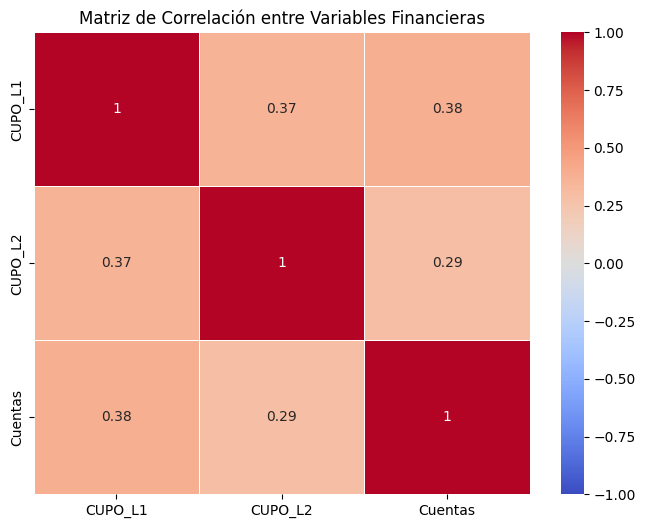

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
variables_financieras = ['CUPO_L1', 'CUPO_L2', 'Cuentas']
correlacion_financieras = df_selected[variables_financieras].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre variables financieras:")
print(correlacion_financieras)

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_financieras, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Financieras')
plt.show()


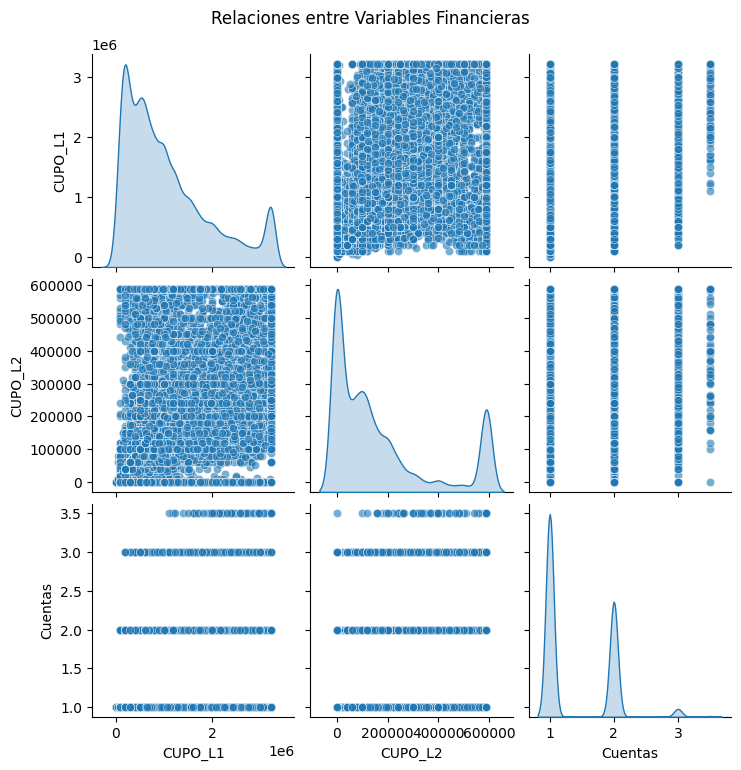

In [89]:
# Gráfico de dispersión entre las variables financieras
sns.pairplot(df_selected[variables_financieras], height=2.5, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Relaciones entre Variables Financieras', y=1.02)
plt.show()


In [90]:
import pandas as pd

# Selección de las variables financieras
variables_financieras = ['CUPO_L1', 'CUPO_L2', 'Cuentas']

# Calcular estadísticas descriptivas
stats_financieras = df_selected[variables_financieras].describe()

# Mostrar resultados
print("Estadísticas descriptivas para variables financieras:")
print(stats_financieras)

# Calcular correlaciones entre las variables
correlacion_financieras = df_selected[variables_financieras].corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación entre variables financieras:")
print(correlacion_financieras)


Estadísticas descriptivas para variables financieras:
            CUPO_L1        CUPO_L2       Cuentas
count  5.112400e+04   51124.000000  51124.000000
mean   1.079704e+06  168494.783584      1.406023
std    8.752906e+05  197202.698501      0.545133
min    0.000000e+00       0.000000      1.000000
25%    4.000000e+05    1000.000000      1.000000
50%    8.000000e+05  100000.000000      1.000000
75%    1.527000e+06  236029.250000      2.000000
max    3.217500e+06  588573.125000      3.500000

Matriz de correlación entre variables financieras:
          CUPO_L1   CUPO_L2   Cuentas
CUPO_L1  1.000000  0.366927  0.384104
CUPO_L2  0.366927  1.000000  0.291461
Cuentas  0.384104  0.291461  1.000000


### **Análisis Breve de Relaciones entre Variables Financieras**
1. **Correlación**
* CUPO_L1 y CUPO_L2: Correlación moderada (0.3669), indicando una relación positiva entre los cupos de ambos productos financieros.
* CUPO_L1 y Cuentas: Relación moderada (0.3841), sugiriendo que los clientes con más cupo en CUPO_L1 tienden a tener más cuentas activas.
* CUPO_L2 y Cuentas: Relación débil a moderada (0.2915), lo que refleja menor dependencia entre estas variables.
2. **Estadísticas Descriptivas**
* CUPO_L1: Media alta ($1,079,704) y gran variabilidad, representando clientes con cupos altos y bajos.

* CUPO_L2: Media más baja ($168,494) y rango más limitado, indicando concentración en cupos menores.
* Cuentas: Mayoría de clientes tienen entre 1 y 2 cuentas, mostrando comportamiento uniforme.
3. **Observaciones Clave**
* Relación moderada entre CUPO_L1 y CUPO_L2 sugiere conexión entre productos financieros.
* Cuentas tiene un impacto más débil sobre los cupos, especialmente CUPO_L2.
* CUPO_L1 destaca como la variable más representativa del comportamiento financiero general.

**Implicaciones**
* CUPO_L1 es la variable clave para analizar patrones financieros.
* Cuentas aporta información adicional pero con menor impacto.


# Conclusión General



## **1. Clasificación: ¿Qué factores influyen en la probabilidad de que un cliente tenga una cuenta corriente activa?**

El análisis mostró que las variables más relevantes para predecir la probabilidad de tener una cuenta corriente activa (Ctacte) son:

* **Edad**: Correlación negativa fuerte (-0.2449), indicando que los clientes jóvenes tienen mayor probabilidad de tener una cuenta activa.
* **Antigüedad**: Relación negativa moderada (-0.2275), sugiriendo que los clientes nuevos están más involucrados en este producto.
* **Cuentas**: Correlación positiva moderada (0.1519), lo que refleja que diversificar productos financieros está asociado con cuentas activas.

**Conclusión**: Edad, Antigüedad y Cuentas son factores clave, mientras que variables como Renta tienen poca influencia.

## **2. Regresión: ¿Cómo varía la renta promedio según la edad?**
* La **renta promedio** aumenta con la edad hasta los 50-60 años ($661,576), alcanzando su pico, para luego disminuir gradualmente en grupos mayores.
* La **correlación positiva débil** (0.1357) indica que, aunque la relación entre Edad y Renta es positiva, no es suficientemente fuerte para predecir ingresos basados solo en la edad.
* La **pendiente de la regresión** (2,355.83) sugiere un aumento promedio moderado en la renta por cada año adicional.

**Conclusión**: La relación entre Edad y Renta no es lineal; un modelo polinomial podría reflejar mejor la variación.

## **3. Exploración de Relaciones: ¿Existen relaciones significativas entre CUPO_L1, CUPO_L2 y Cuentas?**
* CUPO_L1 y CUPO_L2: Correlación moderada (0.3669), mostrando que ambos productos están relacionados.
* Cuentas **con** CUPO_L1 y CUPO_L2: Relaciones más débiles (0.3841 y 0.2915), indicando que el número de cuentas activas tiene un impacto limitado sobre los cupos.
* Las estadísticas descriptivas revelaron que CUPO_L1 tiene mayor variabilidad y mejor representa el comportamiento financiero de los clientes.

**Conclusión**: CUPO_L1 es la variable clave entre los productos financieros, mientras que Cuentas y CUPO_L2 aportan información complementaria.

## Resumen Final
* **Edad, Antigüedad, y Cuentas** destacan como las variables más importantes para clasificar clientes con cuentas activas.
* La **relación entre Edad y Renta** es limitada y requiere un modelo más complejo para reflejar su tendencia no lineal.
* En los productos financieros, CUPO_L1 emerge como el factor más representativo del comportamiento financiero.